# Neural Network

### Imports

In [ ]:
from os import getcwd
from copy import deepcopy
from random import randint
from os.path import abspath, join
from torch import nn, optim, flatten
from torch import no_grad, save, load
from matplotlib.pyplot import imshow
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

### Dataset

In [ ]:
transform = ToTensor()

PATH = abspath(getcwd())
traindata = MNIST(PATH, True, transform, download = True)
testdata = MNIST(PATH, False, transform, download = True)

len(traindata), len(testdata)

(60000, 10000)

### Dataloaders

In [ ]:
BATCH = 64
trainloader = DataLoader(traindata, BATCH, True)
testloader = DataLoader(testdata, BATCH, True)

### Convolutional Network

In [ ]:
class ConvNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.convol = nn.Sequential(
      nn.Conv2d(1, 16, (3, 3)),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
      nn.Conv2d(16, 32, (3, 3)),
      nn.ReLU(),
      nn.MaxPool2d(2, 2)
    )

    self.linear = nn.Sequential(
      nn.Linear(800, 256),
      nn.ReLU(),
      nn.Linear(256, 10)
    )

  def forward(self, x):
    x = flatten(self.convol(x), 1)
    return self.linear(x)

In [ ]:
model = ConvNetwork().cpu()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 1e-3)

### Treinando a rede

In [ ]:
def train(model: nn.Module, dataloader: DataLoader, lossfunc, optimizer: optim.Optimizer):
  model.train()
  comloss = 0.0
  for img, label in dataloader:
    img, label = img.cpu(), label.cpu()
    optimizer.zero_grad()
    pred = model(img)
    loss = lossfunc(pred, label)
    loss.backward()
    optimizer.step()
    comloss += loss.item()
  return comloss / len(dataloader)

@no_grad()
def test(model: nn.Module, dataloader: DataLoader, lossfunc):
  model.eval()
  comloss = 0.0
  for img, label in dataloader:
    img, label = img.cpu(), label.cpu()
    pred = model(img)
    loss = lossfunc(pred, label)
    comloss += loss.item()
  return comloss / len(dataloader)

In [ ]:
EPOCHS = 60
for t in range(EPOCHS):
  trainloss = train(model, trainloader, lossfunc, optimizer)
  testloss = test(model, testloader, lossfunc)
  if trainloss > testloss:
    best_model_state = deepcopy(model.state_dict())
  print(f"Epoch: {t+1}, Train Loss: {trainloss}, Testloss: {testloss}")

Epoch: 1, Train Loss: 2.2899799690063576, Testloss: 2.273153271644738
Epoch: 2, Train Loss: 2.2479276977368254, Testloss: 2.2124190816454066
Epoch: 3, Train Loss: 2.135658033112727, Testloss: 2.0066881908732617
Epoch: 4, Train Loss: 1.6831679575478853, Testloss: 1.2331386645128772
Epoch: 5, Train Loss: 0.9179754890422068, Testloss: 0.6792732397462152
Epoch: 6, Train Loss: 0.6032650905059599, Testloss: 0.5159413569672092
Epoch: 7, Train Loss: 0.49177714732727773, Testloss: 0.4389034410950485
Epoch: 8, Train Loss: 0.4359013321303101, Testloss: 0.39967906000507863
Epoch: 9, Train Loss: 0.400214196554125, Testloss: 0.36747670316012804
Epoch: 10, Train Loss: 0.3750906576162208, Testloss: 0.34782653828715066
Epoch: 11, Train Loss: 0.35423839185982625, Testloss: 0.32810239845020756
Epoch: 12, Train Loss: 0.3362085053216674, Testloss: 0.3109744630137067
Epoch: 13, Train Loss: 0.32050244278236745, Testloss: 0.2997636875719022
Epoch: 14, Train Loss: 0.3060609910533881, Testloss: 0.28073658224693

### Salvando os parâmetros

In [ ]:
PARAM = abspath(join(PATH, "ConvParam.pt"))
save(best_model_state, PARAM)

### Carregando os parâmetros

In [ ]:
PARAM = abspath(join(PATH, "ConvParam.pt"))
model = ConvNetwork().cpu()
model.load_state_dict(load(PARAM))

<All keys matched successfully>

### Vendo alguma imagem

In [ ]:
@no_grad()
def visualizar(model: nn.Module, data: Dataset):
  idx = randint(0, len(data))
  img, label = data[idx]
  imshow(img.squeeze())

  model.eval()
  pre = model(img.unsqueeze(0)).numpy().flatten()
  val, _ = max(enumerate(pre), key = lambda x: x[1])
  return f"predição: {val}, real: {label}"

'predição: 4, real: 4'

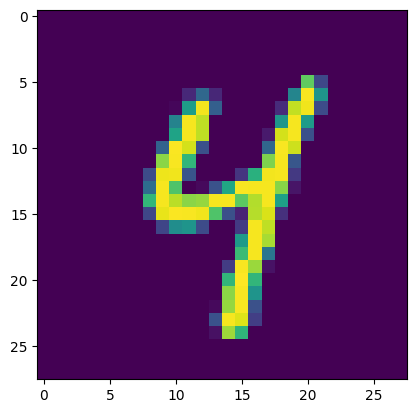

In [ ]:
visualizar(model, testdata)